In [39]:
#Import Libraries
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

#----------------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
#----------------------------------------------------

In [109]:
#reading data
data = pd.read_csv('heart.csv')

data.describe()
data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


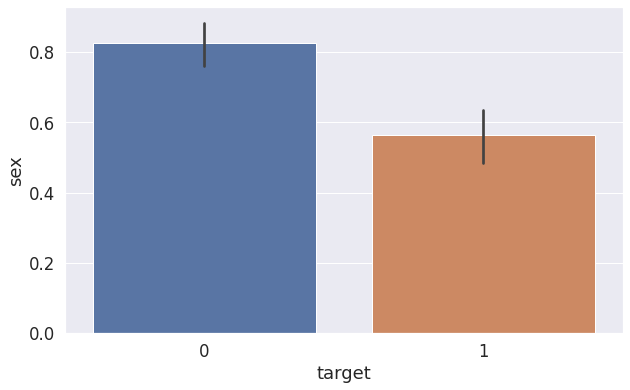

In [112]:
# Plot the value counts with a bar graph
def BPlot(feature_1,feature_2) :
    global data
    fig, ax = plt.subplots(figsize=(10,6))
    sns.barplot(x=feature_1, y=feature_2 , data=data)

BPlot("target","sex")

In [113]:
#Finding Categorical Featurs
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O' ]
print(categorical_features )
####or
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'category' ]
print(categorical_features )

[]
[]


In [114]:
#missing data 
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
age,0,0.0
sex,0,0.0
cp,0,0.0
trestbps,0,0.0
chol,0,0.0
fbs,0,0.0
restecg,0,0.0
thalach,0,0.0
exang,0,0.0
oldpeak,0,0.0


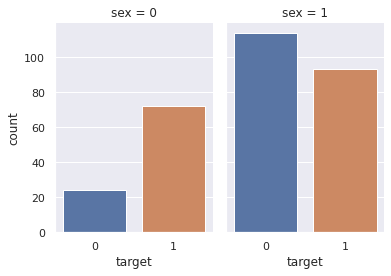

In [117]:
import seaborn as sns
sns.set(style="darkgrid")
g = sns.catplot(x="target", hue=None, col="sex",
                 data=data, kind="count",
                 height=4, aspect=.7);

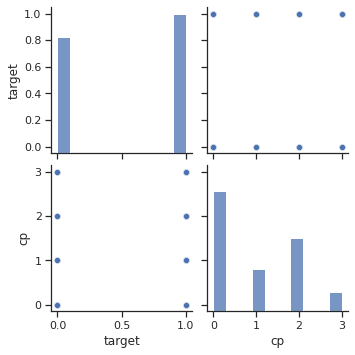

In [122]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, vars=["target", "cp"])

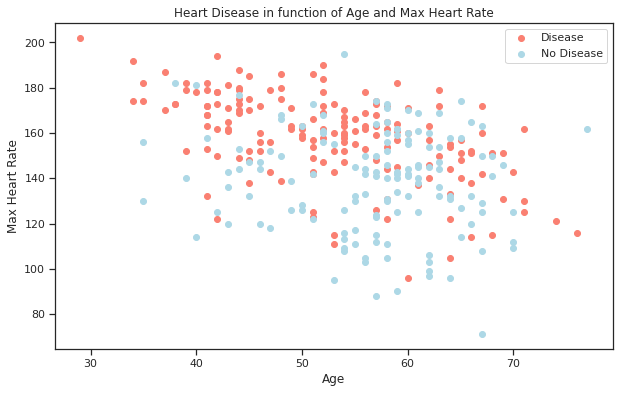

In [125]:
df = data
# Create another figure
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");



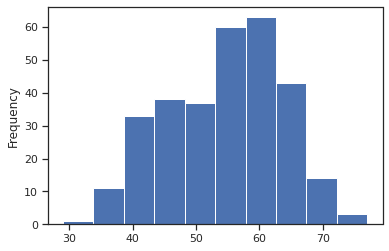

In [126]:
data.age.plot.hist();


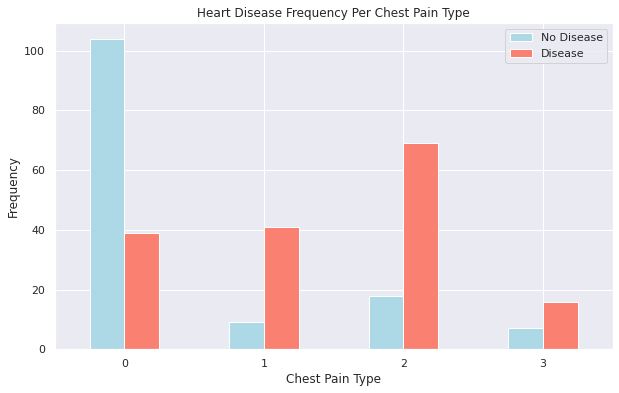

In [137]:
# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);


age        -0.225439
sex        -0.280937
cp          0.433798
trestbps   -0.144931
chol       -0.085239
fbs        -0.028046
restecg     0.137230
thalach     0.421741
exang      -0.436757
oldpeak    -0.430696
slope       0.345877
ca         -0.391724
thal       -0.344029
target      1.000000
Name: target, dtype: float64


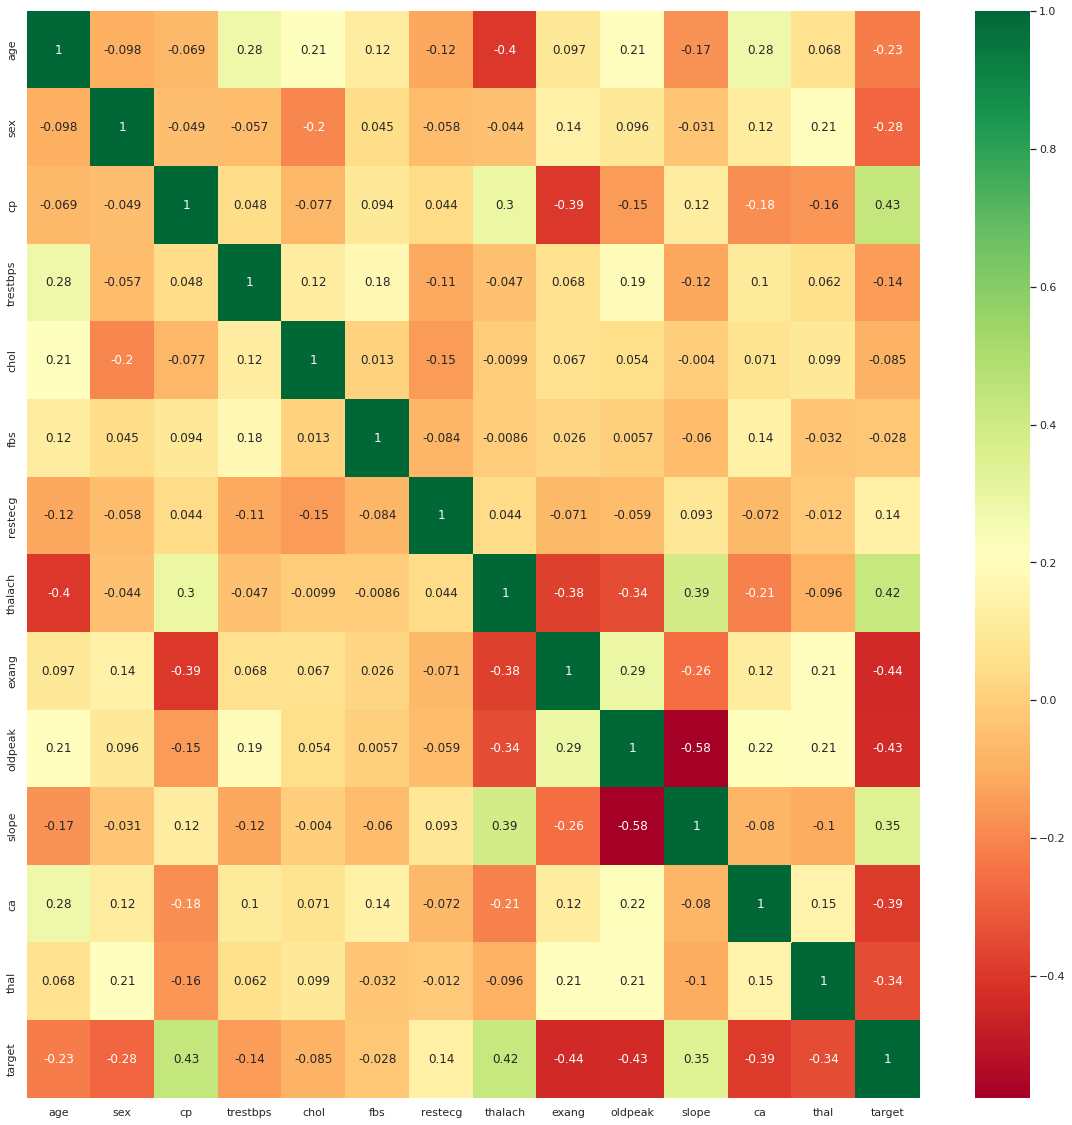

In [144]:
#correlations_data = data.corr()['price'].sort_values(ascending=False)
cor=data.corr()['target']
# Print the correlations
print(cor)

import matplotlib.pyplot as plt
import seaborn as sns

#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [145]:
#X Data
X = data.drop(['target'], axis=1, inplace=False)
#print('X Data is \n' , X.head())
#print('X shape is ' , X.shape)

#y Data
y = data['target']
#print('y Data is \n' , y.head())
#print('y shape is ' , y.shape)


In [146]:

# Cleaning data

'''
impute.SimpleImputer(missing_values=nan, strategy='mean’, fill_value=None, verbose=0, copy=True)
'''


ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)


#X Data
#print('X Data is \n' , X[:10])

#y Data
#print('y Data is \n' , y[:10])

#----------------------------------------------------
#Standard Scaler for Data

scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X = scaler.fit_transform(X)

#showing data
#print('X \n' , X[:10])
#print('y \n' , y[:10])

#----------------------------------------------------
#Splitting data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=44, shuffle =True)

#Splitted Data
#print('X_train shape is ' , X_train.shape)
#print('X_test shape is ' , X_test.shape)
#print('y_train shape is ' , y_train.shape)
#print('y_test shape is ' , y_test.shape)





{'KNN': 0.85, 'Logistic Regression': 0.81, 'Random Forest': 0.84, 'DecisionTree': 0.74, 'SVC': 0.83, 'GaussianNB': 0.81, 'GradientBoosting': 0.78}


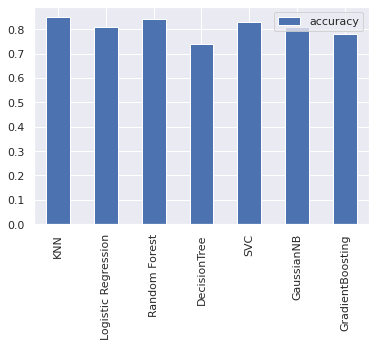

In [147]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier(),
          "DecisionTree" :  DecisionTreeClassifier(),
          "SVC"          : SVC(),
          "GaussianNB"   : GaussianNB(),
          "GradientBoosting": GradientBoostingClassifier()}

# Create function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed for reproducible results
    np.random.seed(44)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
print(np.array(model_scores))

#Model Comparison
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();



In [148]:
#Import Libraries
from sklearn.neighbors import KNeighborsClassifier
#----------------------------------------------------

#----------------------------------------------------
#Applying KNeighborsClassifier Model 

'''
sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform’, algorithm=’auto’, leaf_size=30,
                                       p=2, metric='minkowski’, metric_params=None,n_jobs=None)
'''

KNNClassifierModel = KNeighborsClassifier(n_neighbors= 8,weights ='uniform', # it can be distance
                                          algorithm='auto',leaf_size=1,p=2) # it can be ball_tree, kd_tree,brute
KNNClassifierModel.fit(X_train, y_train)

#Calculating Details
print('KNNClassifierModel Train Score is : ' , KNNClassifierModel.score(X_train, y_train))
print('KNNClassifierModel Test Score is : ' , KNNClassifierModel.score(X_test, y_test))
#print('----------------------------------------------------')

#Calculating Prediction
y_pred = KNNClassifierModel.predict(X_test)
y_pred_prob = KNNClassifierModel.predict_proba(X_test)
#print('Predicted Value for KNNClassifierModel is : ' , y_pred[:10])
#print('Prediction Probabilities Value for KNNClassifierModel is : ' , y_pred_prob[:10])

KNNClassifierModel Train Score is :  0.8522167487684729
KNNClassifierModel Test Score is :  0.89


In [149]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Use GridSearch
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(KNNClassifierModel , hyperparameters, cv=10)

#Fit the model
best_model = clf.fit(X_train, y_train)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])
print("Best Score Is : ",best_model .best_score_)

Best leaf_size: 1
Best p: 2
Best n_neighbors: 10
Best Score Is :  0.8376190476190477


In [170]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=10)


In [150]:
# Create a list of train scores
train_scores = []

# Create a list of test scores
test_scores = []

# Create a list of different values for n_neighbors
Itration = range(1, 21) # 1 to 20  ####ضع اي قيمة تريد ايجاد قيمتها هنا

# Setup algorithm
Model = KNeighborsClassifier()   ####ضع اي مودل هنا

# Loop through different neighbors values
for i in Itration:
    Model .set_params(n_neighbors = i) # set neighbors value
    
    # Fit the algorithm
    Model .fit(X_train, y_train)
    
    # Update the training scores
    train_scores.append(Model .score(X_train, y_train))
    
    # Update the test scores
    test_scores.append(Model .score(X_test, y_test))
print("train_scores",[ '%.2f' % elem for elem in train_scores ])
print("test_scores ",[ '%.2f' % elem for elem in test_scores ])

train_scores ['1.00', '0.88', '0.88', '0.85', '0.85', '0.86', '0.85', '0.85', '0.86', '0.88', '0.85', '0.86', '0.84', '0.84', '0.84', '0.84', '0.83', '0.83', '0.82', '0.83']
test_scores  ['0.80', '0.79', '0.84', '0.85', '0.85', '0.85', '0.88', '0.89', '0.86', '0.85', '0.85', '0.85', '0.83', '0.84', '0.83', '0.82', '0.84', '0.84', '0.83', '0.85']


Maximum Model score on the test data: 89.00%


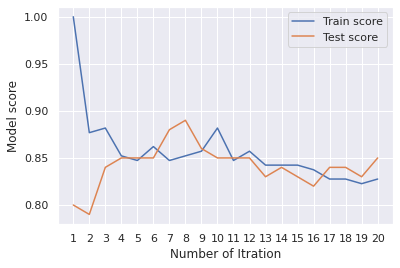

In [151]:
plt.plot(Itration, train_scores, label="Train score")
plt.plot(Itration, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of Itration")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum Model score on the test data: {max(test_scores)*100:.2f}%")


In [152]:
#Import Libraries
from sklearn.metrics import roc_curve
#----------------------------------------------------

#----------------------------------------------------
#Calculating Receiver Operating Characteristic :  
#roc_curve(y_true, y_score, pos_label=None, sample_weight=None,drop_intermediate=True)

fprValue, tprValue, thresholdsValue = roc_curve(y_test,y_pred)
print('fpr Value  : ', fprValue)
print('tpr Value  : ', tprValue)
print('thresholds Value  : ', thresholdsValue)

fpr Value  :  [0.         0.13043478 1.        ]
tpr Value  :  [0.         0.90740741 1.        ]
thresholds Value  :  [2 1 0]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


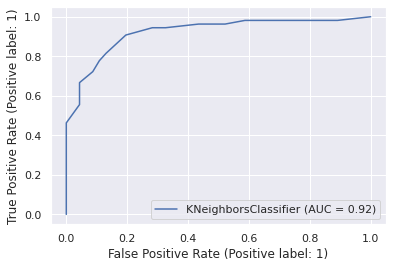

In [153]:
# Import ROC curve function from metrics module
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(Model, X_test, y_test);


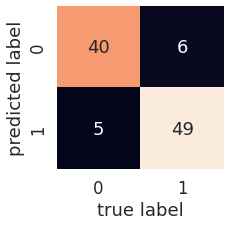

In [154]:
# Import Seaborn
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
sns.set(font_scale=1.5) # Increase font size

def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_pred),
                     annot=True, # Annotate the boxes
                     cbar=False)
    plt.xlabel("true label")
    plt.ylabel("predicted label")
    
plot_conf_mat(y_test, y_pred)


In [155]:
#Import Libraries
from sklearn.model_selection import cross_val_predict
#----------------------------------------------------

#----------------------------------------------------
#Applying Cross Validate Predict :  
'''
model_selection.cross_val_predict(estimator, X, y=None, groups=None,cv=’warn’, n_jobs=None,verbose=0,
                                  fit_params=None, pre_dispatch=‘2*n_jobs’,method=’predict’)
'''

#  don't forget to define the model first !!!
CrossValidatePredictionTrain = cross_val_predict(KNNClassifierModel, X_train, y_train, cv=5)
CrossValidatePredictionTest = cross_val_predict(KNNClassifierModel, X_test, y_test, cv=5)

# Showing Results
print('Cross Validate Prediction for Training Set: \n', CrossValidatePredictionTrain[:10])
print('Cross Validate Prediction for Testing Set: \n', CrossValidatePredictionTest[:10])

Cross Validate Prediction for Training Set: 
 [0 1 0 1 0 1 0 1 0 1]
Cross Validate Prediction for Testing Set: 
 [1 1 1 1 1 1 0 1 0 0]


In [156]:
#Import Libraries
from sklearn.model_selection import cross_val_score
#----------------------------------------------------

#----------------------------------------------------
#Applying Cross Validate Score :  
'''
model_selection.cross_val_score(estimator,X,y=None,groups=None,scoring=None,cv=’warn’,n_jobs=None,verbose=0,
                                fit_params=None,pre_dispatch=‘2*n_jobs’,error_score=’raise-deprecating’)
'''

#  don't forget to define the model first !!!
CrossValidateScoreTrain = cross_val_score(KNNClassifierModel, X_train, y_train, cv=5)
CrossValidateScoreTest = cross_val_score(KNNClassifierModel, X_test, y_test, cv=5)

# Showing Results
print('Cross Validate Score for Training Set: \n', np.mean(CrossValidateScoreTrain))
print('Cross Validate Score for Testing Set: \n', np.mean(CrossValidateScoreTest))

Cross Validate Score for Training Set: 
 0.8084146341463414
Cross Validate Score for Testing Set: 
 0.8300000000000001


In [157]:
best_model.best_params_

{'leaf_size': 1, 'n_neighbors': 10, 'p': 2}

accuracy   0.8316939890710383
precision  0.8485465172965172
recall  0.8484848484848484
f1  0.8465329870889386


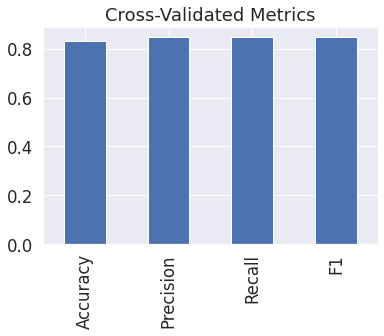

In [171]:
from sklearn.model_selection import cross_val_score

# Instantiate best model with best hyperparameters (found with GridSearchCV)
clf = KNeighborsClassifier(n_neighbors= 8,weights ='uniform',
                                          algorithm='auto',leaf_size=1,p=2)

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, # 5-fold cross-validation
                         scoring="accuracy") # accuracy as scoring
# print(cv_acc)

cv_acc = np.mean(cv_acc)
print("accuracy  ",cv_acc)

# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
print("precision ",cv_precision)

# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
print("recall ",cv_recall)

# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
print("f1 ",cv_f1)


# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);



In [178]:
import pickle
# Save an extisting model to file
pickle.dump(clf, open("clf.pkl", "wb"))
# Load a saved model
loaded_pickle_model = pickle.load(open("clf.pkl", "rb"))
print(loaded_pickle_model.score(X_test,y_test))

0.89
